<a href="https://colab.research.google.com/github/hemant-rana/HR-Case-Study/blob/main/Rezo_ai_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Importing Data

In [113]:
DataSet = pd.read_csv("/content/drive/MyDrive/Rezo.AI Assignment/archive/general_data.csv")
HR_Data = pd.read_csv("/content/drive/MyDrive/Rezo.AI Assignment/archive/manager_survey_data.csv")
Employee_Data = pd.read_csv("/content/drive/MyDrive/Rezo.AI Assignment/archive/employee_survey_data.csv")

In [114]:
DataSet.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [115]:
HR_Data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [116]:
Employee_Data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Merging Data

In [117]:
DataSet = pd.merge(HR_Data, DataSet, how='inner', on='EmployeeID')
DataSet = pd.merge(Employee_Data, DataSet, how='inner', on='EmployeeID')

In [118]:
DataSet.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,3,3,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,2,4,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,2.0,2.0,1.0,3,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,4.0,4.0,3.0,2,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,4.0,1.0,3.0,3,3,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


Missing Values

In [119]:
DataSet.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [120]:
DataSet = DataSet.dropna()

Descriptive Analysis

In [122]:
DataSet.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2.723953,2.724884,2.761163,2.728837,3.153953,36.926977,9.197907,2.913256,2.066977,65059.844186,2.690000,15.210698,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1.093802,1.101875,0.707800,0.710769,0.360946,9.146517,8.097059,1.024774,1.106633,47045.398914,2.495764,3.662777,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,30.000000,2.000000,2.000000,1.000000,29260.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,2.000000,49360.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,43.000000,14.000000,4.000000,3.000000,83802.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Descriptive Analysis group wise (Attrition)

In [123]:
DataSet.groupby('Attrition').describe()

EnvironmentSatisfaction                           ... YearsWithCurrManager                
                            count      mean       std  min  ...                  25%  50%  75%   max
Attrition                                                   ...                                     
No                         3605.0  2.773648  1.071694  1.0  ...                  2.0  3.0  7.0  17.0
Yes                         695.0  2.466187  1.169346  1.0  ...                  0.0  2.0  5.0  14.0

[2 rows x 144 columns]

No     83.8%
Yes    16.2%
Name: Attrition, dtype: object

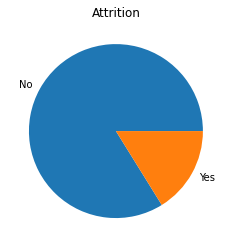

In [184]:
AttritionDA = DataSet.Attrition.value_counts()
AttritionDA.plot(kind='pie')
plt.title('Attrition')
plt.ylabel('')
percent = DataSet.Attrition.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent

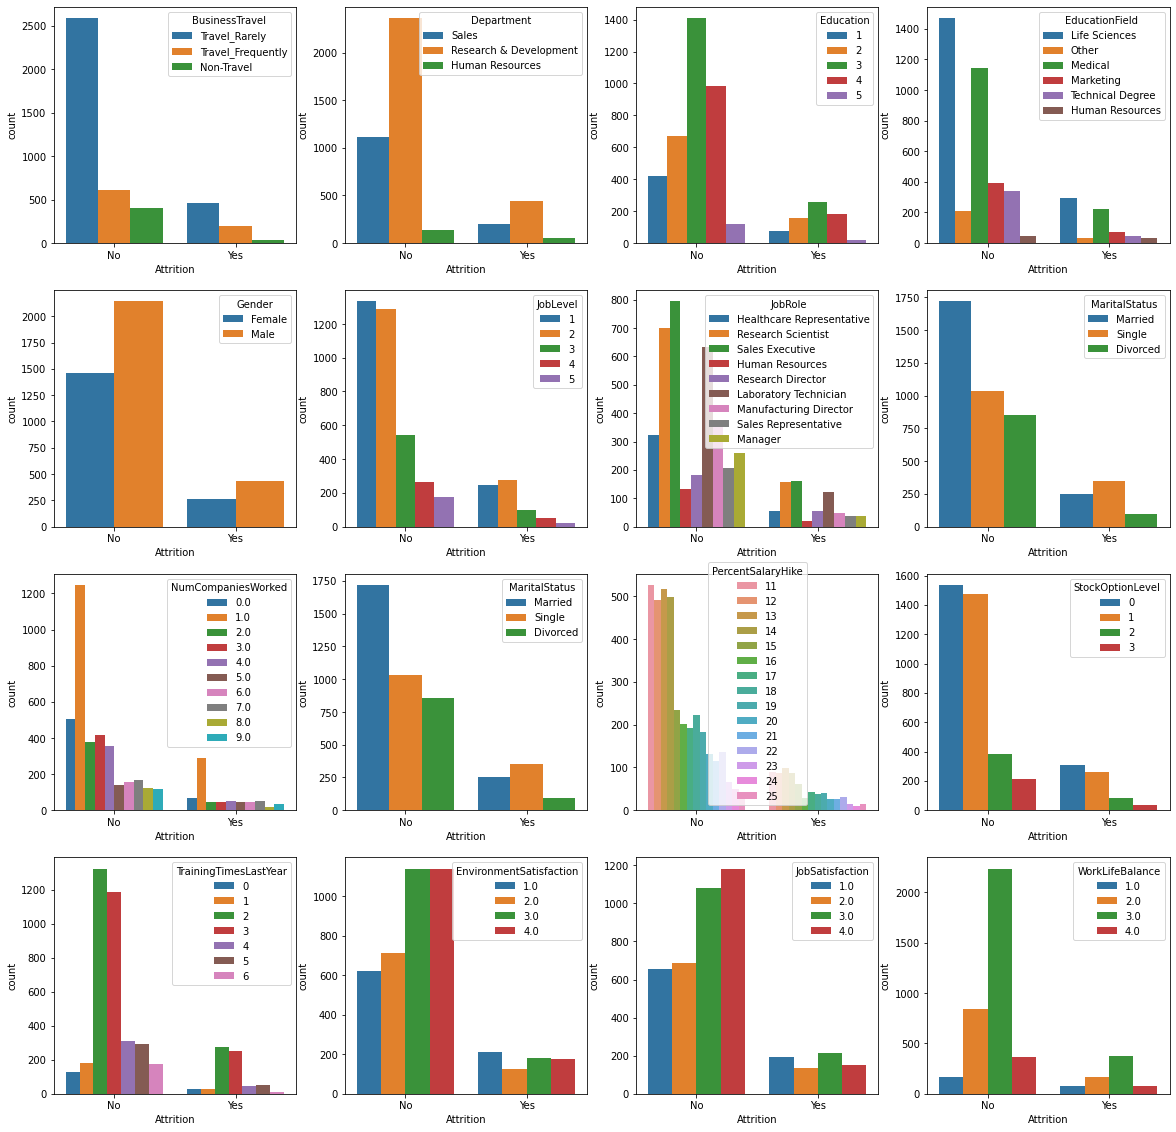

In [185]:
figure,axis = plt.subplots(nrows=4,ncols=4,figsize=(20,20))
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='BusinessTravel',ax=axis[0,0])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='Department',ax=axis[0,1])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='Education',ax=axis[0,2])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='EducationField',ax=axis[0,3])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='Gender',ax=axis[1,0])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='JobLevel',ax=axis[1,1])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='JobRole',ax=axis[1,2])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='MaritalStatus',ax=axis[1,3])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='NumCompaniesWorked',ax=axis[2,0])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='MaritalStatus',ax=axis[2,1])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='PercentSalaryHike',ax=axis[2,2])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='StockOptionLevel',ax=axis[2,3])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='TrainingTimesLastYear',ax=axis[3,0])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='EnvironmentSatisfaction',ax=axis[3,1])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='JobSatisfaction',ax=axis[3,2])
sns.countplot(x='Attrition',data=DataSet,orient='v',hue='WorkLifeBalance',ax=axis[3,3])

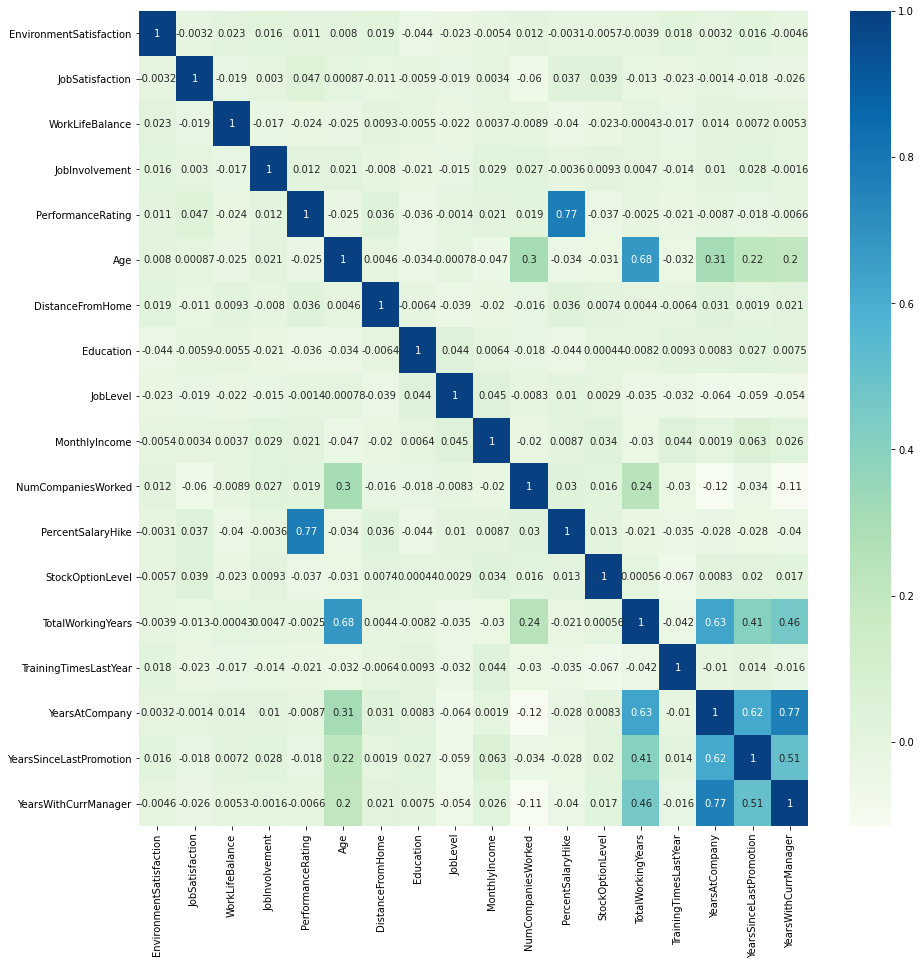

In [186]:
correlation = DataSet.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cmap="GnBu",annot=True)

Labeling Categorical Variables to numeric

In [187]:
DataSet_1 = pd.get_dummies(DataSet, columns = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])
DataSet_1['Attrition'] = DataSet_1['Attrition'].astype('category')
DataSet_1['Gender'] = DataSet_1['Gender'].astype('category')
DataSet_1['Attrition'] = DataSet_1['Attrition'].cat.codes
DataSet_1['Gender'] = DataSet_1['Gender'].cat.codes

In [188]:
DataSet_1 = DataSet_1.reset_index()
DataSet_1.head()

,index,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,Attrition,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,3.0,4.0,2.0,3,3,51,0,6,2,0,1,131160,1.0,11,0,1.0,6,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,3.0,2.0,4.0,2,4,31,1,10,1,0,1,41890,0.0,23,1,6.0,3,5,1,4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,2.0,2.0,1.0,3,3,32,0,17,4,1,4,193280,1.0,15,3,5.0,2,5,0,3,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,4.0,4.0,3.0,2,3,38,0,2,5,1,3,83210,3.0,11,3,13.0,5,8,7,5,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,4,4.0,1.0,3.0,3,3,32,0,10,1,1,1,23420,4.0,12,2,9.0,2,6,0,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [189]:
DataSet_1 = DataSet_1.drop(['index'],axis=1)

Logisitc Regression

In [ ]:
y = DataSet_1['Attrition']
X = DataSet_1.drop(['Attrition'],axis=1)
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression()
acc_score = []
for train_index , test_index in kf.split(X):
  X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
  y_train , y_test = y[train_index], y[test_index]
  model.fit(X_train,y_train)
  pred_values = model.predict(X_test)
  acc = accuracy_score(pred_values , y_test)
  acc_score.append(acc)
avg_acc_score = sum(acc_score)/k

Accuracy

In [197]:
avg_acc_score*100

83.90697674418604